In [81]:
import numpy as np
import pandas as pd

In [82]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AFC/archive_logs_for_AFC.csv")

# Step 2: Select Important Field

In [83]:
selected_columns = [
    'syscheck.event',
    'syscheck.path',
    'syscheck.attrs_after',
    'syscheck.changed_attributes',
    'syscheck.size_before',
    'syscheck.size_after',
    'syscheck.mtime_before',
    'syscheck.mtime_after',
    'syscheck.md5_before',
    'syscheck.md5_after',
    'syscheck.uid_after',
    'syscheck.uname_after',
    # 'syscheck.arch',
    'agent.name',
    'timestamp'
]

# Only keep the selected columns
df = df[selected_columns]

> Showing basic information

In [84]:
df.shape

(8590, 14)

In [85]:
df.dtypes

,0
syscheck.event,object
syscheck.path,object
syscheck.attrs_after,object
syscheck.changed_attributes,object
syscheck.size_before,object
syscheck.size_after,object
syscheck.mtime_before,object
syscheck.mtime_after,object
syscheck.md5_before,object
syscheck.md5_after,object


In [86]:
df.head(3)

,syscheck.event,syscheck.path,syscheck.attrs_after,syscheck.changed_attributes,syscheck.size_before,syscheck.size_after,syscheck.mtime_before,syscheck.mtime_after,syscheck.md5_before,syscheck.md5_after,syscheck.uid_after,syscheck.uname_after,agent.name,timestamp
0,modified,/etc/cups/subscriptions.conf.O,-,"size, mtime, md5, sha1, sha256",692,995,"Apr 28, 2025 @ 17:51:22.000","Apr 28, 2025 @ 18:51:53.000",5a8ab3ac1df925372d49339bd90723fd,70bf2c9a124f225dbacbcb943213b7a1,0,root,charlie-VirtualBox,"Apr 28, 2025 @ 22:22:35.559"
1,modified,/etc/cups/subscriptions.conf,-,"size, mtime, md5, sha1, sha256",991,995,"Apr 28, 2025 @ 17:52:06.000","Apr 28, 2025 @ 19:50:13.000",2de3faa67048eebac429437660e7f83c,d65661ab94034c7b1a6a5237a327898a,0,root,charlie-VirtualBox,"Apr 28, 2025 @ 22:22:35.544"
2,added,c:\users\project\downloads\file draw arachtecture,ARCHIVE,-,-,"731,886",-,"Apr 24, 2025 @ 15:27:54.000",-,3adaf9c358d63b4cfc0dc8b62cd450a2,S-1-5-21-1369641331-677134100-2035290052-1001,Project,DESKTOP-5JEIKFF,"Apr 28, 2025 @ 21:56:12.215"


In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8590 entries, 0 to 8589
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   syscheck.event               8590 non-null   object
 1   syscheck.path                8590 non-null   object
 2   syscheck.attrs_after         8590 non-null   object
 3   syscheck.changed_attributes  8590 non-null   object
 4   syscheck.size_before         8590 non-null   object
 5   syscheck.size_after          8590 non-null   object
 6   syscheck.mtime_before        8590 non-null   object
 7   syscheck.mtime_after         8590 non-null   object
 8   syscheck.md5_before          8590 non-null   object
 9   syscheck.md5_after           8590 non-null   object
 10  syscheck.uid_after           8590 non-null   object
 11  syscheck.uname_after         7000 non-null   object
 12  agent.name                   8590 non-null   object
 13  timestamp                    2500

In [88]:
# pip install -U ydata-profiling

In [89]:
# from ydata_profiling import ProfileReport
# p_report = ProfileReport(df)
# p_report.to_file("/content/drive/MyDrive/Colab Notebooks/AFC/Report/EDA_for_AFC.html")

## Plotting

ValueError: Could not interpret value `md5_changed` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

# Step 3: Handle Missing Values

> Replace '-' with NaN in the entire dataset and Fill missing values

In [78]:
import pandas as pd
import numpy as np

# Replace "-" with NaN
df.replace("-", np.nan, inplace=True)

# Fill attrs_after and changed_attributes based on event type
df.loc[(df['syscheck.event'] == 'added') & (df['syscheck.attrs_after'].isnull()), 'syscheck.attrs_after'] = 'ARCHIVE'
df.loc[(df['syscheck.event'] == 'deleted') & (df['syscheck.attrs_after'].isnull()), 'syscheck.attrs_after'] = 'ARCHIVE'

df.loc[(df['syscheck.event'] == 'added') & (df['syscheck.changed_attributes'].isnull()), 'syscheck.changed_attributes'] = 'added'
df.loc[(df['syscheck.event'] == 'deleted') & (df['syscheck.changed_attributes'].isnull()), 'syscheck.changed_attributes'] = 'deleted'

# Fill size_before and size_after
df.loc[(df['syscheck.event'] == 'added') & (df['syscheck.size_before'].isnull()), 'syscheck.size_before'] = 0
df.loc[(df['syscheck.event'] == 'deleted') & (df['syscheck.size_after'].isnull()), 'syscheck.size_after'] = 0

# Fill mtime_before and mtime_after
df.loc[(df['syscheck.event'] == 'added') & (df['syscheck.mtime_before'].isnull()), 'syscheck.mtime_before'] = 'N/A'
df.loc[(df['syscheck.event'] == 'deleted') & (df['syscheck.mtime_after'].isnull()), 'syscheck.mtime_after'] = 'N/A'

# Fill md5_after with md5_before if md5_after is missing
df.loc[df['syscheck.md5_after'].isnull() & df['syscheck.md5_before'].notnull(), 'syscheck.md5_after'] = df['syscheck.md5_before']

# Fill uid_after for Windows agents
windows_rows = df['agent.name'].str.contains('DESKTOP', na=False)
df.loc[windows_rows & df['syscheck.uid_after'].isnull(), 'syscheck.uid_after'] = 'S-1-WIN-DEFAULT'

# Fill uname_after
df['syscheck.uname_after'].fillna('Project', inplace=True)

# Drop rows with missing path (critical field)
df.dropna(subset=['syscheck.path'], inplace=True)

# Fill missing timestamps
df['timestamp'].fillna('Missing Timestamp', inplace=True)

# Final catch-all: Replace remaining NaNs
# df.fillna('UNKNOWN', inplace=True)



<ipython-input-78-7576d0b94dea>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['syscheck.uname_after'].fillna('Project', inplace=True)
<ipython-input-78-7576d0b94dea>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [79]:
df.isnull().sum()

,0
syscheck.event,664
syscheck.path,0
syscheck.attrs_after,1371
syscheck.changed_attributes,396
syscheck.size_before,2138
syscheck.size_after,606
syscheck.mtime_before,1962
syscheck.mtime_after,868
syscheck.md5_before,2535
syscheck.md5_after,1074


In [80]:
df.head(10)

,syscheck.event,syscheck.path,syscheck.attrs_after,syscheck.changed_attributes,syscheck.size_before,syscheck.size_after,syscheck.mtime_before,syscheck.mtime_after,syscheck.md5_before,syscheck.md5_after,syscheck.uid_after,syscheck.uname_after,agent.name,timestamp
0,modified,/etc/cups/subscriptions.conf.O,NaN,"size, mtime, md5, sha1, sha256",692,995,"Apr 28, 2025 @ 17:51:22.000","Apr 28, 2025 @ 18:51:53.000",5a8ab3ac1df925372d49339bd90723fd,70bf2c9a124f225dbacbcb943213b7a1,0,root,charlie-VirtualBox,"Apr 28, 2025 @ 22:22:35.559"
1,modified,/etc/cups/subscriptions.conf,NaN,"size, mtime, md5, sha1, sha256",991,995,"Apr 28, 2025 @ 17:52:06.000","Apr 28, 2025 @ 19:50:13.000",2de3faa67048eebac429437660e7f83c,d65661ab94034c7b1a6a5237a327898a,0,root,charlie-VirtualBox,"Apr 28, 2025 @ 22:22:35.544"
2,added,c:\users\project\downloads\file draw arachtecture,ARCHIVE,added,0,"731,886",N/A,"Apr 24, 2025 @ 15:27:54.000",NaN,3adaf9c358d63b4cfc0dc8b62cd450a2,S-1-5-21-1369641331-677134100-2035290052-1001,Project,DESKTOP-5JEIKFF,"Apr 28, 2025 @ 21:56:12.215"
3,added,c:\users\project\downloads\fim rar.zip,ARCHIVE,added,0,22,N/A,"Apr 28, 2025 @ 19:22:53.000",NaN,76cdb2bad9582d23c1f6f4d868218d6c,S-1-5-21-1369641331-677134100-2035290052-1001,Project,DESKTOP-5JEIKFF,"Apr 28, 2025 @ 21:52:59.736"
4,deleted,c:\users\project\downloads\new winrar zip arch...,ARCHIVE,deleted,NaN,22,NaN,"Apr 28, 2025 @ 19:22:53.000",NaN,76cdb2bad9582d23c1f6f4d868218d6c,S-1-5-21-1369641331-677134100-2035290052-1001,Project,DESKTOP-5JEIKFF,"Apr 28, 2025 @ 21:52:59.694"
5,modified,c:\users\project\downloads\new winrar zip arch...,ARCHIVE,"size, uid, user_name, mtime, md5, sha1, sha256",0,22,"Jan 1, 1970 @ 01:30:00.000","Apr 28, 2025 @ 19:22:53.000",d41d8cd98f00b204e9800998ecf8427e,76cdb2bad9582d23c1f6f4d868218d6c,S-1-5-21-1369641331-677134100-2035290052-1001,Project,DESKTOP-5JEIKFF,"Apr 28, 2025 @ 21:52:53.793"
6,added,c:\users\project\downloads\new winrar zip arch...,ARCHIVE,added,0,0,N/A,"Jan 1, 1970 @ 01:30:00.000",NaN,d41d8cd98f00b204e9800998ecf8427e,S-1-WIN-DEFAULT,Project,DESKTOP-5JEIKFF,"Apr 28, 2025 @ 21:52:53.753"
7,modified,/etc/cups/subscriptions.conf,NaN,"mtime, inode, md5, sha1, sha256",NaN,991,"Apr 28, 2025 @ 13:39:54.000","Apr 28, 2025 @ 15:36:34.000",d740baf38350654ffb6dbd3316bfc943,c934286ee63e72327f9d2d54a53cc90c,0,root,charlie-VirtualBox,"Apr 28, 2025 @ 18:21:55.794"
8,modified,/etc/cups/subscriptions.conf.O,NaN,"mtime, inode, md5, sha1, sha256",NaN,991,"Apr 28, 2025 @ 12:41:34.000","Apr 28, 2025 @ 14:38:14.000",b0a378457517d816aefbe007c5e0a4db,8293eb683a40e08d5c702f774fc3498c,0,root,charlie-VirtualBox,"Apr 28, 2025 @ 18:21:55.794"
9,modified,/etc/cups/subscriptions.conf.O,NaN,"mtime, inode, md5, sha1, sha256",NaN,991,"Apr 28, 2025 @ 10:44:54.000","Apr 28, 2025 @ 12:41:34.000",a552cbe7bb4a0c3d7744c140c778ada4,b0a378457517d816aefbe007c5e0a4db,0,root,charlie-VirtualBox,"Apr 28, 2025 @ 16:21:53.441"


In [ ]:
unique_values = df.nunique()
print(unique_values)

syscheck.event                   12
syscheck.path                  1066
syscheck.attrs_after              6
syscheck.changed_attributes      15
syscheck.size_before            936
syscheck.size_after             680
syscheck.mtime_before          3004
syscheck.mtime_after           1099
syscheck.md5_before            1103
syscheck.md5_after             1137
syscheck.uid_after             1608
syscheck.uname_after           2116
syscheck.arch                     2
agent.name                        7
timestamp                      2384
dtype: int64


## Convert Categorical to Numeric

> Timestamp Features

In [ ]:

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%b %d, %Y @ %H:%M:%S.%f', errors='coerce')


df = df.dropna(subset=['timestamp'])


df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second
df['day_of_week'] = df['timestamp'].dt.weekday

df = df.drop(columns=['timestamp'])


In [ ]:
df.head()

,syscheck.event,syscheck.path,syscheck.attrs_after,syscheck.changed_attributes,syscheck.size_before,syscheck.size_after,syscheck.mtime_before,syscheck.mtime_after,syscheck.md5_before,syscheck.md5_after,...,syscheck.uname_after,syscheck.arch,agent.name,year,month,day,hour,minute,second,day_of_week
0,modified,/etc/cups/subscriptions.conf.O,mtime,"size, mtime, md5, sha1, sha256",692,995,"Apr 28, 2025 @ 17:51:22.000","Apr 28, 2025 @ 18:51:53.000",5a8ab3ac1df925372d49339bd90723fd,70bf2c9a124f225dbacbcb943213b7a1,...,root,[x32],charlie-VirtualBox,2025,4,28,22,22,35,0
1,modified,/etc/cups/subscriptions.conf,mtime,"size, mtime, md5, sha1, sha256",991,995,"Apr 28, 2025 @ 17:52:06.000","Apr 28, 2025 @ 19:50:13.000",2de3faa67048eebac429437660e7f83c,d65661ab94034c7b1a6a5237a327898a,...,root,[x32],charlie-VirtualBox,2025,4,28,22,22,35,0
2,added,c:\users\project\downloads\file draw arachtecture,ARCHIVE,added,REG_SZ,"731,886",ae5ce162888ee3ebe974976cac5ab94a3f55049f851588...,"Apr 24, 2025 @ 15:27:54.000",HKEY_LOCAL_MACHINE\System\CurrentControlSet\Se...,3adaf9c358d63b4cfc0dc8b62cd450a2,...,Project,[x32],DESKTOP-5JEIKFF,2025,4,28,21,56,12,0
3,added,c:\users\project\downloads\fim rar.zip,ARCHIVE,added,REG_SZ,22,ae5ce162888ee3ebe974976cac5ab94a3f55049f851588...,"Apr 28, 2025 @ 19:22:53.000",HKEY_LOCAL_MACHINE\System\CurrentControlSet\Se...,76cdb2bad9582d23c1f6f4d868218d6c,...,Project,[x32],DESKTOP-5JEIKFF,2025,4,28,21,52,59,0
4,deleted,c:\users\project\downloads\new winrar zip arch...,ARCHIVE,added,REG_SZ,22,ae5ce162888ee3ebe974976cac5ab94a3f55049f851588...,"Apr 28, 2025 @ 19:22:53.000",HKEY_LOCAL_MACHINE\System\CurrentControlSet\Se...,76cdb2bad9582d23c1f6f4d868218d6c,...,Project,[x32],DESKTOP-5JEIKFF,2025,4,28,21,52,59,0


> Path Simplification

In [ ]:
df['directory'] = df['syscheck.path'].apply(lambda x: '/'.join(x.split('/')[:-1]) if isinstance(x, str) else x)
df['file_extension'] = df['syscheck.path'].apply(lambda x: x.split('.')[-1] if isinstance(x, str) and '.' in x else 'no_ext')


> Hash Comparison

In [ ]:
df['md5_changed'] = df['syscheck.md5_before'] != df['syscheck.md5_after']


In [ ]:
df.head()

,syscheck.event,syscheck.path,syscheck.attrs_after,syscheck.changed_attributes,syscheck.size_before,syscheck.size_after,syscheck.mtime_before,syscheck.mtime_after,syscheck.md5_before,syscheck.md5_after,...,year,month,day,hour,minute,second,day_of_week,directory,file_extension,md5_changed
0,modified,/etc/cups/subscriptions.conf.O,mtime,"size, mtime, md5, sha1, sha256",692,995,"Apr 28, 2025 @ 17:51:22.000","Apr 28, 2025 @ 18:51:53.000",5a8ab3ac1df925372d49339bd90723fd,70bf2c9a124f225dbacbcb943213b7a1,...,2025,4,28,22,22,35,0,/etc/cups,O,True
1,modified,/etc/cups/subscriptions.conf,mtime,"size, mtime, md5, sha1, sha256",991,995,"Apr 28, 2025 @ 17:52:06.000","Apr 28, 2025 @ 19:50:13.000",2de3faa67048eebac429437660e7f83c,d65661ab94034c7b1a6a5237a327898a,...,2025,4,28,22,22,35,0,/etc/cups,conf,True
2,added,c:\users\project\downloads\file draw arachtecture,ARCHIVE,added,REG_SZ,"731,886",ae5ce162888ee3ebe974976cac5ab94a3f55049f851588...,"Apr 24, 2025 @ 15:27:54.000",HKEY_LOCAL_MACHINE\System\CurrentControlSet\Se...,3adaf9c358d63b4cfc0dc8b62cd450a2,...,2025,4,28,21,56,12,0,,no_ext,True
3,added,c:\users\project\downloads\fim rar.zip,ARCHIVE,added,REG_SZ,22,ae5ce162888ee3ebe974976cac5ab94a3f55049f851588...,"Apr 28, 2025 @ 19:22:53.000",HKEY_LOCAL_MACHINE\System\CurrentControlSet\Se...,76cdb2bad9582d23c1f6f4d868218d6c,...,2025,4,28,21,52,59,0,,zip,True
4,deleted,c:\users\project\downloads\new winrar zip arch...,ARCHIVE,added,REG_SZ,22,ae5ce162888ee3ebe974976cac5ab94a3f55049f851588...,"Apr 28, 2025 @ 19:22:53.000",HKEY_LOCAL_MACHINE\System\CurrentControlSet\Se...,76cdb2bad9582d23c1f6f4d868218d6c,...,2025,4,28,21,52,59,0,,zip,True


In [ ]:
print(df.dtypes)



syscheck.event                 object
syscheck.path                  object
syscheck.attrs_after           object
syscheck.changed_attributes    object
syscheck.size_before           object
syscheck.size_after            object
syscheck.mtime_before          object
syscheck.mtime_after           object
syscheck.md5_before            object
syscheck.md5_after             object
syscheck.uid_after             object
syscheck.uname_after           object
syscheck.arch                  object
agent.name                     object
year                            int32
month                           int32
day                             int32
hour                            int32
minute                          int32
second                          int32
day_of_week                     int32
directory                      object
file_extension                 object
md5_changed                      bool
dtype: object


In [ ]:
# Size fields to numeric
df['syscheck.size_before'] = pd.to_numeric(df['syscheck.size_before'].astype(str).str.replace(",", ""), errors='coerce')
df['syscheck.size_after'] = pd.to_numeric(df['syscheck.size_after'].astype(str).str.replace(",", ""), errors='coerce')

# Convert datetime fields
df['syscheck.mtime_before'] = pd.to_datetime(df['syscheck.mtime_before'], errors='coerce')
df['syscheck.mtime_after'] = pd.to_datetime(df['syscheck.mtime_after'], errors='coerce')

# Confirm datatypes again
print(df.dtypes)


<ipython-input-192-b14600a48190>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['syscheck.mtime_before'] = pd.to_datetime(df['syscheck.mtime_before'], errors='coerce')


syscheck.event                         object
syscheck.path                          object
syscheck.attrs_after                   object
syscheck.changed_attributes            object
syscheck.size_before                  float64
syscheck.size_after                   float64
syscheck.mtime_before          datetime64[ns]
syscheck.mtime_after           datetime64[ns]
syscheck.md5_before                    object
syscheck.md5_after                     object
syscheck.uid_after                     object
syscheck.uname_after                   object
syscheck.arch                          object
agent.name                             object
year                                    int32
month                                   int32
day                                     int32
hour                                    int32
minute                                  int32
second                                  int32
day_of_week                             int32
directory                         

<ipython-input-192-b14600a48190>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['syscheck.mtime_after'] = pd.to_datetime(df['syscheck.mtime_after'], errors='coerce')


In [ ]:
df['syscheck.mtime_before'] = pd.to_datetime(df['syscheck.mtime_before'], format="%b %d, %Y @ %H:%M:%S.%f", errors='coerce')
df['syscheck.mtime_after'] = pd.to_datetime(df['syscheck.mtime_after'], format="%b %d, %Y @ %H:%M:%S.%f", errors='coerce')
print(df.dtypes)

syscheck.event                         object
syscheck.path                          object
syscheck.attrs_after                   object
syscheck.changed_attributes            object
syscheck.size_before                  float64
syscheck.size_after                   float64
syscheck.mtime_before          datetime64[ns]
syscheck.mtime_after           datetime64[ns]
syscheck.md5_before                    object
syscheck.md5_after                     object
syscheck.uid_after                     object
syscheck.uname_after                   object
syscheck.arch                          object
agent.name                             object
year                                    int32
month                                   int32
day                                     int32
hour                                    int32
minute                                  int32
second                                  int32
day_of_week                             int32
directory                         

In [ ]:
df.head()


,syscheck.event,syscheck.path,syscheck.attrs_after,syscheck.changed_attributes,syscheck.size_before,syscheck.size_after,syscheck.mtime_before,syscheck.mtime_after,syscheck.md5_before,syscheck.md5_after,...,year,month,day,hour,minute,second,day_of_week,directory,file_extension,md5_changed
0,modified,/etc/cups/subscriptions.conf.O,mtime,"size, mtime, md5, sha1, sha256",692.0,995.0,NaT,NaT,5a8ab3ac1df925372d49339bd90723fd,70bf2c9a124f225dbacbcb943213b7a1,...,2025,4,28,22,22,35,0,/etc/cups,O,True
1,modified,/etc/cups/subscriptions.conf,mtime,"size, mtime, md5, sha1, sha256",991.0,995.0,NaT,NaT,2de3faa67048eebac429437660e7f83c,d65661ab94034c7b1a6a5237a327898a,...,2025,4,28,22,22,35,0,/etc/cups,conf,True
2,added,c:\users\project\downloads\file draw arachtecture,ARCHIVE,added,NaN,731886.0,NaT,NaT,HKEY_LOCAL_MACHINE\System\CurrentControlSet\Se...,3adaf9c358d63b4cfc0dc8b62cd450a2,...,2025,4,28,21,56,12,0,,no_ext,True
3,added,c:\users\project\downloads\fim rar.zip,ARCHIVE,added,NaN,22.0,NaT,NaT,HKEY_LOCAL_MACHINE\System\CurrentControlSet\Se...,76cdb2bad9582d23c1f6f4d868218d6c,...,2025,4,28,21,52,59,0,,zip,True
4,deleted,c:\users\project\downloads\new winrar zip arch...,ARCHIVE,added,NaN,22.0,NaT,NaT,HKEY_LOCAL_MACHINE\System\CurrentControlSet\Se...,76cdb2bad9582d23c1f6f4d868218d6c,...,2025,4,28,21,52,59,0,,zip,True


In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of object columns to encode
categorical_cols = df.select_dtypes(include='object').columns

# Apply label encoding to each
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Ensure string conversion
    label_encoders[col] = le  # Store encoder for inverse transform if needed
print(df.dtypes)

syscheck.event                          int64
syscheck.path                           int64
syscheck.attrs_after                    int64
syscheck.changed_attributes             int64
syscheck.size_before                  float64
syscheck.size_after                   float64
syscheck.mtime_before          datetime64[ns]
syscheck.mtime_after           datetime64[ns]
syscheck.md5_before                     int64
syscheck.md5_after                      int64
syscheck.uid_after                      int64
syscheck.uname_after                    int64
syscheck.arch                           int64
agent.name                              int64
year                                    int32
month                                   int32
day                                     int32
hour                                    int32
minute                                  int32
second                                  int32
day_of_week                             int32
directory                         

In [ ]:
df.head()


,syscheck.event,syscheck.path,syscheck.attrs_after,syscheck.changed_attributes,syscheck.size_before,syscheck.size_after,syscheck.mtime_before,syscheck.mtime_after,syscheck.md5_before,syscheck.md5_after,...,year,month,day,hour,minute,second,day_of_week,directory,file_extension,md5_changed
0,11,1,4,12,692.0,995.0,NaT,NaT,147,437,...,2025,4,28,22,22,35,0,2,0,True
1,11,0,4,12,991.0,995.0,NaT,NaT,69,978,...,2025,4,28,22,22,35,0,2,2,True
2,9,897,0,0,NaN,731886.0,NaT,NaT,816,217,...,2025,4,28,21,56,12,0,0,8,True
3,9,898,0,0,NaN,22.0,NaT,NaT,816,456,...,2025,4,28,21,52,59,0,0,13,True
4,10,900,0,0,NaN,22.0,NaT,NaT,816,456,...,2025,4,28,21,52,59,0,0,13,True


<ipython-input-201-d7706bbd2e7a>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)  # Replace NaN with 0, or use df.dropna() if preferred


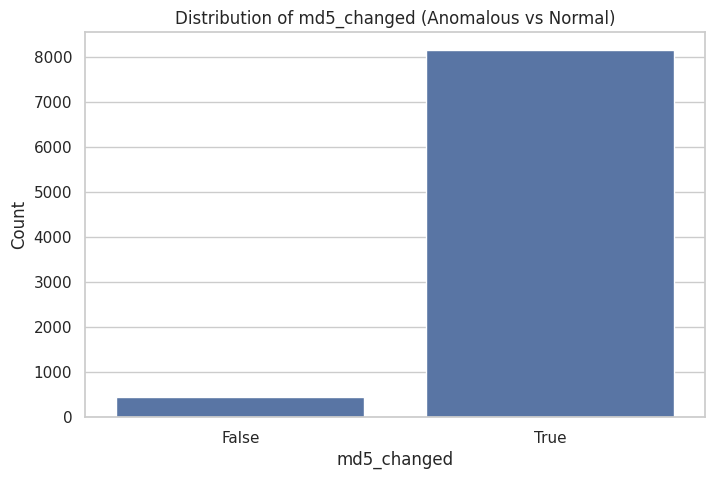

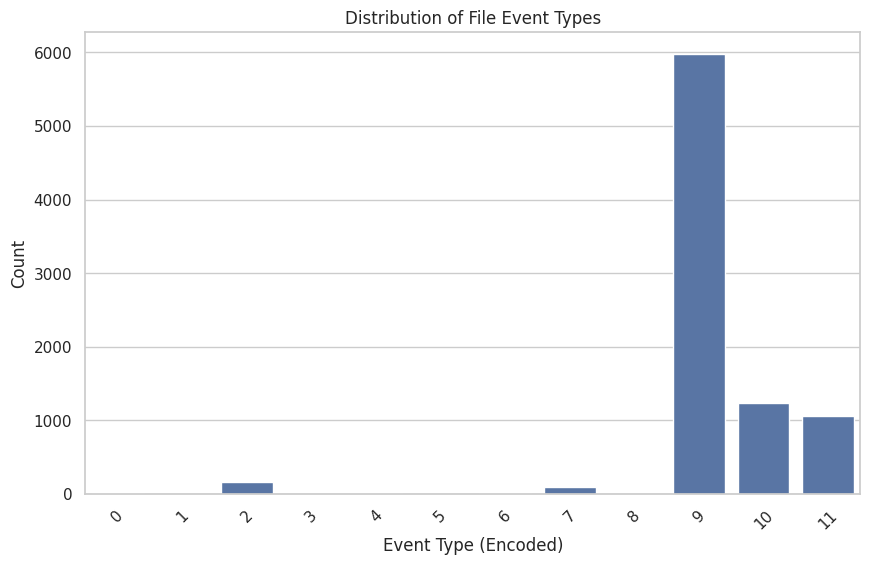

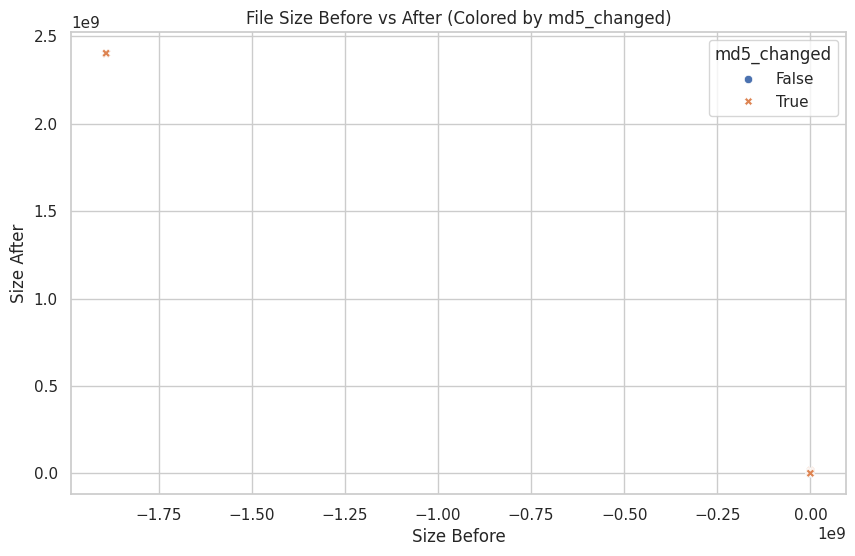

In [ ]:
# Plot 3: Scatter Plot of Size Before vs Size After
plt.figure(figsize=(10, 6))
sns.scatterplot(x='syscheck.size_before', y='syscheck.size_after', hue='md5_changed', style='md5_changed', data=df)
plt.title('File Size Before vs After (Colored by md5_changed)')
plt.xlabel('Size Before')
plt.ylabel('Size After')
plt.savefig('size_before_after_scatter.png')
plt.show()

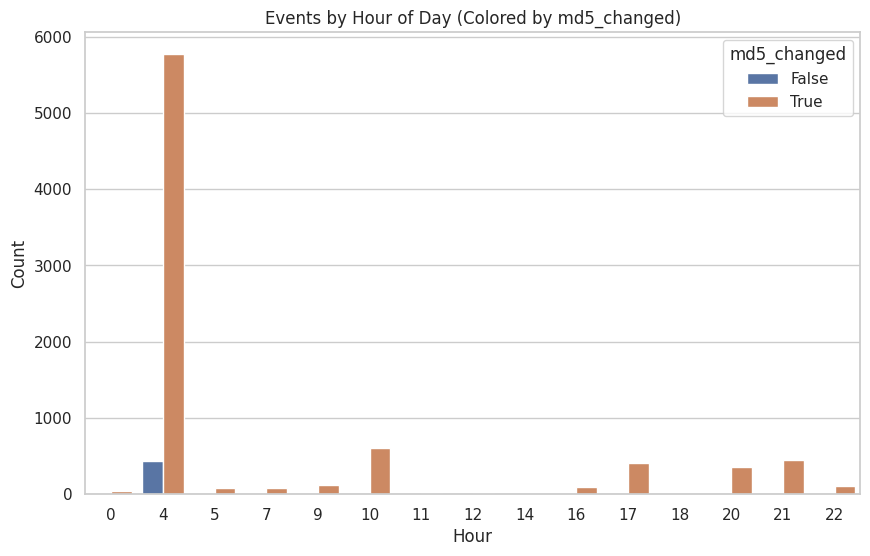

In [ ]:
# Plot 4: Temporal Analysis (Events by Hour)
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', hue='md5_changed', data=df)
plt.title('Events by Hour of Day (Colored by md5_changed)')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.savefig('events_by_hour.png')
plt.show()